**Simple Linear Regression**

Estimated coefficients:
b_0 = 7836.258660508078  
b_1 = -502.42494226327875


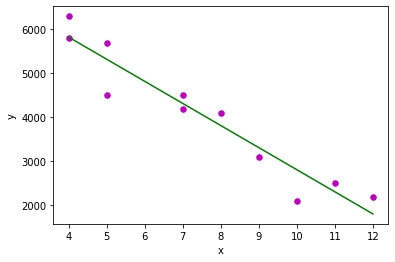

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m", marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	#x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	#y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
 x = np.array([4,4,5,5,7,7,8,9,10,11,12])
 y = np.array([6300,5800,5700,4500,4500,4200,4100,3100,2100,2500,2200])
 b = estimate_coef(x, y)
 print("Estimated coefficients:\nb_0 = {} \
 \nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
 plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


Multiple Linear Regression

Coefficients:  [[ 3.05572145 -0.57606982  0.09829306]
 [ 0.2460658  -0.08181243  0.02957337]
 [ 1.05104015 -0.02860659 -0.06334527]]
Variance score: -3.208887637303492


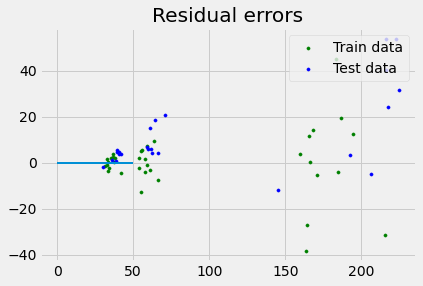

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_linnerud (return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()


In the above example, we determine the accuracy score using Explained Variance Score. 
We define: 
explained_variance_score = 1 – Var{y – y’}/Var{y} 
where y’ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation. 
The best possible score is 1.0, lower values are worse.  